**KNN**, **K-Nearest Neighbors** (K vecinos más cercanos), es un algoritmo de **aprendizaje supervisado** utilizado tanto para problemas de **clasificación** como de **regresión**. 

### ¿Qué es KNN?

KNN es un algoritmo que clasifica un nuevo punto de datos basándose en la **similaridad** con otros puntos de datos en el conjunto de entrenamiento. Utiliza la distancia entre los puntos de datos para determinar cuáles son "cercanos" o "similares".

### ¿Cómo funciona KNN?

1. **Elección del valor de K**: 
   - El primer paso en KNN es elegir un número **K**, que representa cuántos vecinos cercanos se considerarán para hacer la clasificación. Por ejemplo, si se elige K=3, el algoritmo considerará los 3 puntos de datos más cercanos al punto que se está clasificando.

2. **Cálculo de distancias**: 
   - Para clasificar un nuevo punto de datos, el algoritmo calcula la **distancia** entre ese punto y todos los puntos en el conjunto de entrenamiento. Se pueden usar varias métricas de distancia, como la **distancia euclidiana**, **manhattan**, o **Minkowski**.

3. **Identificación de los vecinos más cercanos**:
   - Una vez que se han calculado las distancias, KNN selecciona los K puntos más cercanos al nuevo punto de datos.

4. **Clasificación**:
   - Para problemas de clasificación, el algoritmo asigna la clase que es más común entre esos K vecinos. Por ejemplo, si 2 de los 3 vecinos son de la clase "A" y 1 es de la clase "B", el nuevo punto se clasificará como "A".
   - En el caso de la regresión, KNN promediaría los valores de los K vecinos para hacer la predicción.

### Ejemplo

Supongamos que estamos clasificando flores en dos categorías: "Setosa" y "Versicolor", y tenemos un conjunto de datos con características como el **largo del pétalo** y el **ancho del pétalo**.

- **Paso 1**: Elegir K = 3.
- **Paso 2**: Calcular la distancia entre la nueva flor y todas las flores en el conjunto de entrenamiento.
- **Paso 3**: Identificar las 3 flores más cercanas.
- **Paso 4**: Contar cuántas de estas flores son "Setosa" y cuántas son "Versicolor". Si hay 2 "Setosa" y 1 "Versicolor", clasificamos la nueva flor como "Setosa".

### Pros y Contras de KNN

#### Pros:

1. **Simplicidad**: KNN es fácil de entender e implementar.
2. **No paramétrico**: No hace suposiciones sobre la distribución de los datos, lo que lo hace flexible.
3. **Efectividad**: Puede ser muy efectivo en problemas de clasificación si se elige el K adecuado y los datos están bien distribuidos.

#### Contras:

1. **Costo computacional**: KNN puede ser lento, especialmente con conjuntos de datos grandes, ya que requiere calcular la distancia de cada punto a todos los demás puntos en el conjunto de entrenamiento.
2. **Sensibilidad a la escala de los datos**: Si las características tienen escalas diferentes, la distancia puede estar sesgada. Por eso, es importante **normalizar** o **escalar** los datos.
3. **Elección de K**: La elección del valor de K puede afectar mucho el rendimiento del modelo. Un K demasiado pequeño puede hacer que el modelo sea sensible al ruido, mientras que un K demasiado grande puede suavizar demasiado las decisiones.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

In [56]:
def KNN(train_knight: pd.DataFrame, test_knight: pd.DataFrame, output_file="KNN.txt"):
    # Definir las características (X) y la etiqueta (y) del conjunto de entrenamiento
    features = ['Hability', 'Agility', 'Reactivity', 'Push', 'Survival', 'Blocking', 'Deflection', 'Mass', 'Sprint', 'Attunement']
    #features = train_knight.columns.difference(['knight'])
    X = train_knight[features].values  # Convertir a NumPy array
    y = train_knight['knight'].values  # Convertir a NumPy array

    # Escalar las características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Inicializar el modelo KNN con un valor k=9
    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train, y_train)

    # Hacer predicciones y calcular el F1-Score
    y_pred_val = knn.predict(X_val)
    f1 = f1_score(y_val, y_pred_val, average='macro')
    print(f"F1_score : {f1:.2f}")

    # Predecir con el conjunto de prueba (Test_knight)
    X_test = test_knight[features].values  # Convertir a NumPy array
    X_test_scaled = scaler.transform(X_test)
    y_pred_test = knn.predict(X_test_scaled)

    # Guardar las predicciones en un archivo
    with open(output_file, "w") as output:
        for prediction in y_pred_test:
            output.write(prediction + "\n")

In [53]:
def plot_accuracy_vs_k(train_knight: pd.DataFrame) -> None:
    # Definir las características (X) y la etiqueta (y) del conjunto de entrenamiento
    features = ['Hability', 'Agility', 'Reactivity', 'Push', 'Survival', 'Blocking', 'Deflection', 'Mass', 'Sprint', 'Attunement']
    #features = train_knight.columns.difference(['knight'])
    X = train_knight[features].values  # Convertir a NumPy array
    y = train_knight['knight'].values  # Convertir a NumPy array

    # Escalar las características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Dividir los datos en conjunto de entrenamiento y validación
    X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Probar varios valores de k y calcular la precisión
    accuracy = []
    k_range = range(1, 30)
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred_val = knn.predict(X_val)
        accuracy.append(accuracy_score(y_val, y_pred_val))

    # Graficar el rendimiento de KNN con diferentes valores de k
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, accuracy)
    plt.xlabel('k values')
    plt.ylabel('Accuracy')
    plt.show()

In [54]:
def main(train_file, test_file, output_file):
    dataTest = pd.read_csv("subject/Test_knight.csv")
    dataTrain = pd.read_csv("subject/Train_knight.csv")
    
    # Ejecutar el modelo KNN y generar las predicciones
    KNN(dataTrain, dataTest, output_file)
    # Graficar la precisión para diferentes valores de k
    plot_accuracy_vs_k(dataTrain)


F1_score : 0.94


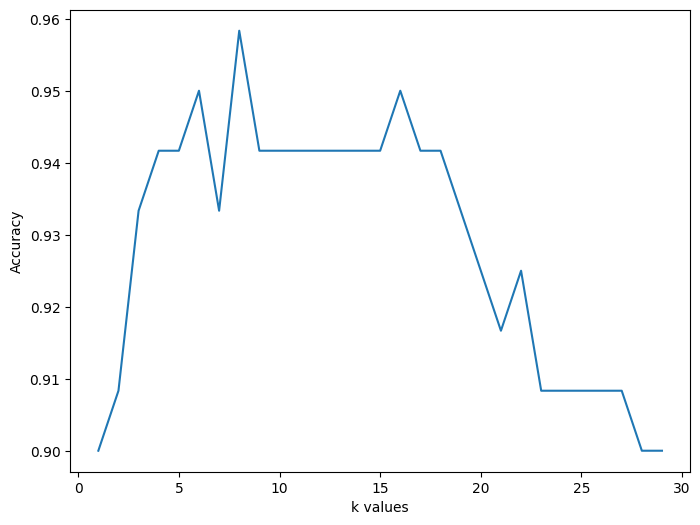

In [55]:
main("./subject/Train_knight.csv", "./subject/Test_knight.csv", "KNN.txt")

El **F1 score** es una métrica utilizada para evaluar el rendimiento de un modelo de clasificación, especialmente en contextos donde hay un desbalance en las clases. 

### Definición del F1 Score

El F1 score es la media armónica entre la **precisión** y el **recall**. Se puede expresar con la siguiente fórmula:


$text{F1 Score} = 2 \cdot \frac{\text{Precisión} \cdot \text{Recall}}{\text{Precisión} + \text{Recall}}$

Donde:

- **Precisión** (Precision): Es la proporción de verdaderos positivos (TP) entre el total de predicciones positivas (TP + FP), donde FP son falsos positivos.
  
    $text{Precisión} = \frac{TP}{TP + FP}$

- **Recall** (o Sensibilidad): Es la proporción de verdaderos positivos (TP) entre el total de casos positivos reales (TP + FN), donde FN son falsos negativos.
  
    $text{Recall} = \frac{TP}{TP + FN}$

### Interpretación

- **F1 Score = 1**: Indica un modelo perfecto, donde la precisión y el recall son ambos 1 (es decir, el modelo no comete errores en sus predicciones).
- **F1 Score = 0**: Indica el peor de los casos, donde no hay verdaderos positivos (el modelo falla completamente en clasificar los casos positivos).

### Importancia del F1 Score

1. **Balance entre Precisión y Recall**: El F1 score es útil cuando se necesita un balance entre la precisión y el recall. Por ejemplo, en un modelo de detección de fraude, es crítico no solo detectar la mayor cantidad de fraudes (recall) sino también asegurarse de que la mayoría de las predicciones positivas sean efectivamente fraudes (precisión).

2. **Casos de Desbalance**: En conjuntos de datos desbalanceados, donde una clase es significativamente más común que otra, la precisión o el recall por sí solos pueden ser engañosos. En tales casos, el F1 score ofrece una evaluación más robusta del rendimiento del modelo.

3. **Uso en Problemas de Clasificación Binaria**: Aunque se puede extender a múltiples clases (macro y micro F1 scores), el F1 score es comúnmente utilizado en problemas de clasificación binaria.

### Ejemplo

Supongamos que tenemos un modelo de clasificación que predice si un email es "spam" o "no spam". Si el modelo hace las siguientes predicciones:

- Verdaderos positivos (TP): 80 (correctamente clasificados como spam)
- Falsos positivos (FP): 20 (incorrectamente clasificados como spam)
- Falsos negativos (FN): 10 (no clasificados como spam, pero deberían haberlo sido)

Podemos calcular:

- **Precisión**: 
  
  $text{Precisión} = \frac{80}{80 + 20} = \frac{80}{100} = 0.80$

- **Recall**: 
  
  $text{Recall} = \frac{80}{80 + 10} = \frac{80}{90} \approx 0.89$

- **F1 Score**: 
  
  $text{F1 Score} = 2 \cdot \frac{0.80 \cdot 0.89}{0.80 + 0.89} \approx 0.84$
